# Прогнозирование оттока клиентов от оператора связи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Необходимо построить такую модель. Результаты будут использоваться оператором для принятия мер, предотвращающих уход клиента. Например, предложение промокодов и специальных условий.  

Нам доступны персональные данные о некоторых клиентах, информация об их тарифах и договорах. Данные содержатся в четырех датасетах:
- `contract_new.csv` - информация о договоре
- `personal_new.csv` - персональные данные клиента
- `internet_new.csv` - информация об интернет-услугах
- `phone_new.csv` - информация об услугах телефонии

В датасете **contract_new.csv** содержатся следующие столбцы:
- `CustomerID` - персональный номер клиента
- `BeginDate` - дата заключения договора с мобильным оператором
- `EndDate` - дата окончания действия договора
- `Type` - тип оплаты (ежемесячно/раз в год/раз в два года)
- `PaperlessBilling` - электронный расчетный лист
- `PaymentMethod` - тип платежа (электронный чек/кредитная карта/чек по почте/банковский перевод)
- `MonthlyCharges` - расходы в  месяц
- `TotalCharges` - общие расходы клиента

В датасете **personal_new.csv**:
- `CustomerID` - персональный номер клиента
- `gender`- пол клиента
- `SeniorCitizen` - является ли клиент пенсионером
- `Partner` - есть ли у абонента супруг/супруга
- `Dependents` - есть ли у абонента дети

В датасете **internet_new.csv**:
- `CustomerID` - персональный номер клиента
- `InternetService` - тип подключения (DSL - через телефонную линию/Fiber Optic - через оптоволоконный кабель)
- `OnlineSecurity` - блокирровка опасных сайтов
- `OnlineBackup` - облачное хранилище файлов для резервного копирования данных
- `DeviceProtection` - антивирус
- `TechSupport` - выделенная линия технической поддержки
- `StreamingTV` - стриминговое телевидение
- `StreamingMovies` - каталог фильмов

В датасете **phone_new.csv** содержатся:
- `customerID` - персональный номер клиента
- `MultipleLines` - подключен ли телефон абонента к нескольким линиям одновременно

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-датасета-и-написание-функций-для-анализа-данных" data-toc-modified-id="Открытие-датасета-и-написание-функций-для-анализа-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие датасета и написание функций для анализа данных</a></span></li><li><span><a href="#Анализ-датасета-contract" data-toc-modified-id="Анализ-датасета-contract-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ датасета contract</a></span></li><li><span><a href="#Анализ-датасета-personal" data-toc-modified-id="Анализ-датасета-personal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ датасета personal</a></span></li><li><span><a href="#Анализ-датасета-internet" data-toc-modified-id="Анализ-датасета-internet-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ датасета internet</a></span></li><li><span><a href="#Анализ-датасета-phone" data-toc-modified-id="Анализ-датасета-phone-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Анализ датасета phone</a></span></li></ul></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Объединение-датасетов" data-toc-modified-id="Объединение-датасетов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Объединение датасетов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Исследование-корреляции-между-признаками" data-toc-modified-id="Исследование-корреляции-между-признаками-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование корреляции между признаками</a></span></li><li><span><a href="#Создание-целевого-признака" data-toc-modified-id="Создание-целевого-признака-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Создание целевого признака</a></span></li></ul></li><li><span><a href="#Определение-профиля-клиента,-расторгающего-договор-с-компанией" data-toc-modified-id="Определение-профиля-клиента,-расторгающего-договор-с-компанией-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение профиля клиента, расторгающего договор с компанией</a></span></li><li><span><a href="#Разделение-на-выборки,-масштабирование-и-кодирование-признаков" data-toc-modified-id="Разделение-на-выборки,-масштабирование-и-кодирование-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разделение на выборки, масштабирование и кодирование признаков</a></span></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Лес-решений" data-toc-modified-id="Лес-решений-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Лес решений</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сравнение моделей</a></span><ul class="toc-item"><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Важность признаков</a></span></li></ul></li><li><span><a href="#Проверка-модели-CatBoost-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-CatBoost-на-тестовой-выборке-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка модели CatBoost на тестовой выборке</a></span></li><li><span><a href="#Итоговый-отчет" data-toc-modified-id="Итоговый-отчет-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Итоговый отчет</a></span></li></ul></div>

**План проекта**
1. Открытие файла и исследовательский анализ четырех датасетов
 - выявление пропусков, неправильных типов столбцов
 - анализ распределения признаков, построение графиков
2. Подготовка признаков к построению модели
 - объединение датасетов
 - работа с пропусками и аномалиями в данных
 - исследование корреляции между признаками
 - создание целевого признака на основе столбца `EndDate`
 - разделение признаков на обучающую, валидационную и тестовую выборки
 - кодирование категориальных признаков
 - масштабирование непрерывных признаков
3. Построение модели и ее оценка 
 - выбор моделей, подбор оптимальных гиперпараметров на основе метрики AUC-ROC на кросс-валидации
 - проверка лучшей модели на тестовой выборке
 - исследование важности признаков лучшей модели
4. Подведение итогов проекта

## Исследовательский анализ данных

### Открытие датасета и написание функций для анализа данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from catboost.utils import select_threshold
from datetime import date
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [3]:
# Напишем функцию для описания датасетов
def data_description(data):
    
    display(data.head())
    display(data.dtypes)
    display(pd.DataFrame(data.isna().sum(), columns=['Количество пропусков']))
    display(data.describe(include='all'))

In [4]:
# Напишем функцию для построения графиков по датасетам
def graphs(data, hist, pie):
    
    for col in hist:
        sns.histplot(data=data, x=col)
        plt.title(f'Распределение {col}')
        plt.show()
        
    for col in pie:
        data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.ylabel('')
        plt.title(f'Распределение {col}')
        plt.show()

### Анализ датасета contract

In [5]:
data_description(contract)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

,Количество пропусков
customerID,0
BeginDate,0
EndDate,0
Type,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,0
TotalCharges,0


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,67,3,2,4,NaN,6658
top,2418-TPEUN,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5942,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Данные в `contract` описывают информацию о договоре клиентов с оператором связи, а именно:
- даты начала и окончания (если есть) контракта
- тип контракта по платежам (оплата раз в месяц/раз в год/раз в два года)
- как клиент получает чеки (электронно или в бумажном виде)
- платежи в месяц
- общая сумма платежей

Можно заметить, что в столбце `BeginDate`, `EndDate`, `TotalCharges` неправильно приведены типы данных, что необходимо исправить. Также нужно привести названия столбцов к стандартному виду. Пропуски есть в столбцах `EndDate` и `TotalCharges`, что необходимо будет обработать

In [6]:
# Приведем даты к нужному типу
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d', errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d', errors='coerce')

# Приведем столбец с суммарными затратами клиента к типу float
contract['TotalCharges'] = contract['TotalCharges'].replace(r'\s+', np.nan, regex=True)
# contract['TotalCharges'].isna().sum()
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

# contract.dtypes

In [7]:
# Приведем названия столбцов к стандартному виду
contract.columns = (contract.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower())
# contract.columns

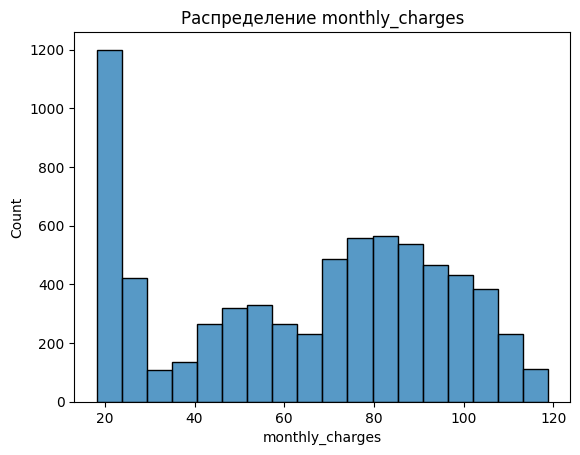

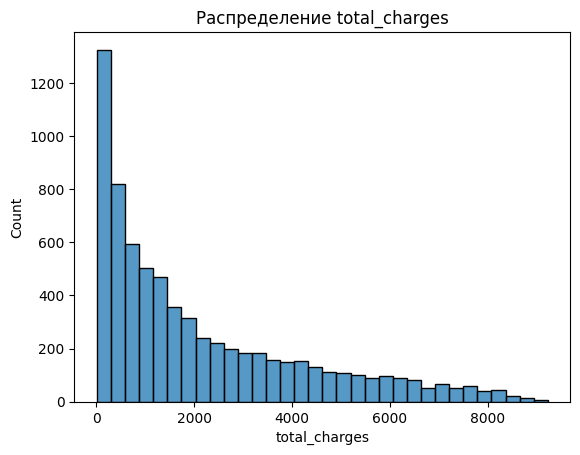

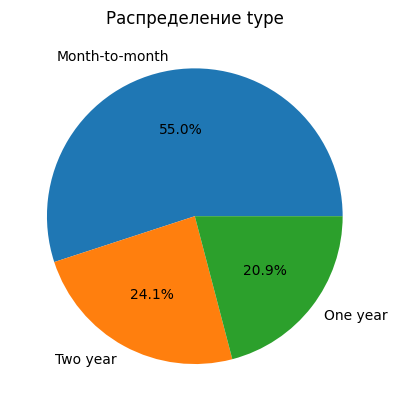

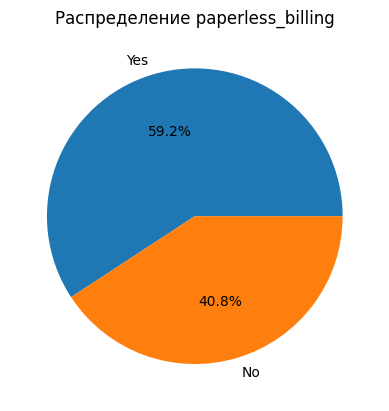

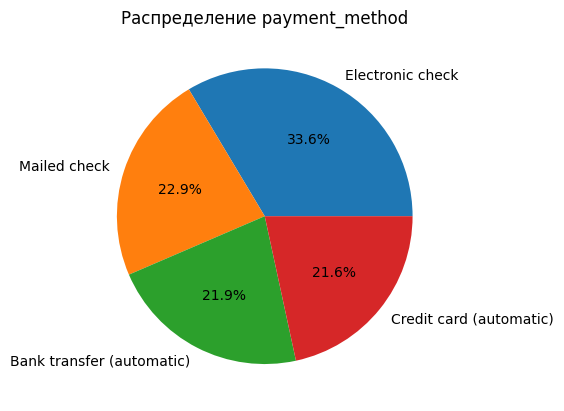

In [8]:
graphs(contract, ['monthly_charges', 'total_charges'], 
       ['type', 'paperless_billing', 'payment_method'])

В распределении затрат клиентов в месяц наблюдается выброс около 20, распределение суммарных затрат напомнинает Хи-квадратное.  
  
Более половины контрактов заключено на базе 'month-to-month', в то время как доля 'one-year' и 'two-year' контрактов в сумме составляет около 45%. Большинство клиентов предпочитают получать чеки в электронном виде - около 60%. Треть клиентов рассчитывается электронными чеками, а доли платежей чеком по почте, банковским переводом и кредитной картой примерно одинаковые - около 22% каждая. 

### Анализ датасета personal

In [9]:
data_description(personal)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

,Количество пропусков
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,2418-TPEUN,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


В датасете `personal` представлена информация о персональных данных клиента:
- пол
- senior citizen - является ли клиент пенсионером
- partner - наличие партнера у клиента (мужа/жены)
- dependents - наличие иждивенцев у клиента

В столбцах все типы данных приведены верно, пропуски в данных отсутствуют. Приведем названия столбцов к стандартному виду

In [10]:
# Приведем названия столбцов к стандартному виду
personal.columns = (personal.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower())
# personal.columns

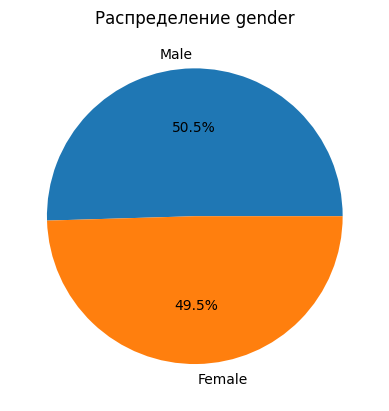

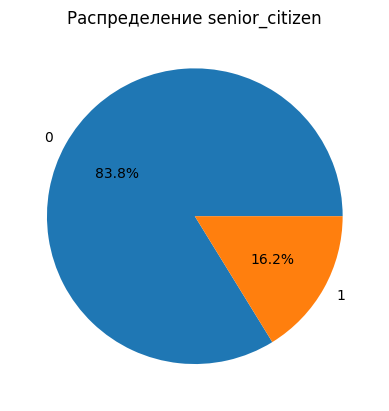

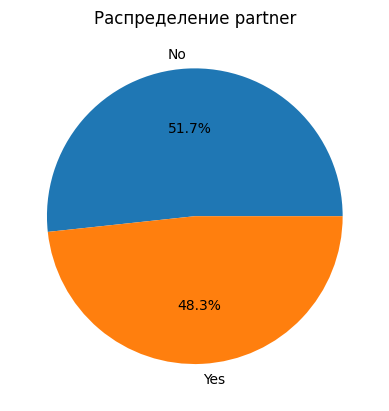

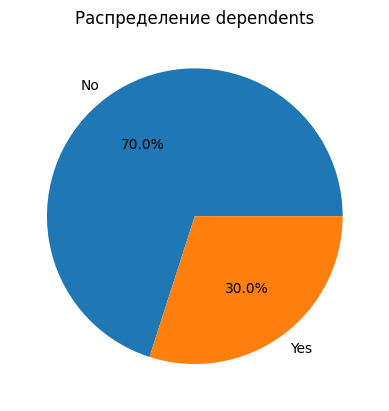

In [11]:
graphs(personal, [], ['gender', 'senior_citizen', 'partner', 'dependents'])

Данные по полу клиентов и по наличию партнера примерно сбалансированы. Доля пенсионеров составляет около 16.2%, а клиентов, обеспечивающих семьи, - около 30%. 

### Анализ датасета internet

In [12]:
data_description(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

,Количество пропусков
customerID,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2205-LPVGL,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


В датасете `internet` представлена информация об интернет услугах, которые предоставляет мобильный оператор клиентам:
- тип подключения (DSL - через телефонную линию/Fiber optic - через оптоволоконный кабель)
- предоставление интернет безопасности
- предоставление облачного хранилища файлов для резервного копирования данных
- предоставление антивируса
- наличие выделенной линии технической поддержки
- наличие стриминогового телевидения и каталога фильмов

Все типы данных в столбцах приведены верно, пропуски в данных отсутствуют. Приведем названия столбцов к стандартному виду

In [13]:
# Приведем названия столбцов к стандартному виду
internet.columns = (internet.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower())
# internet.columns

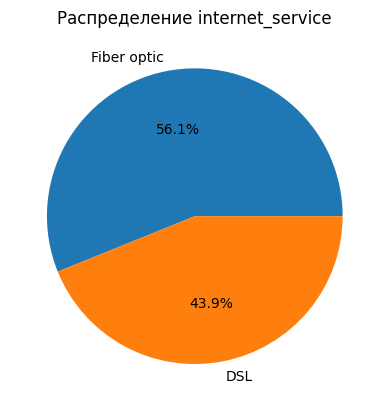

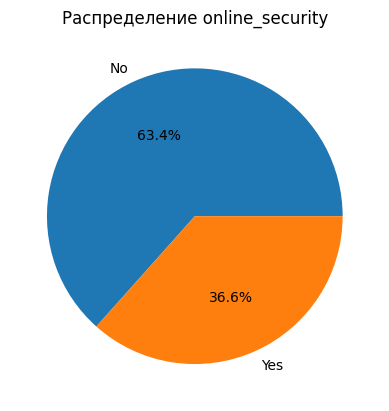

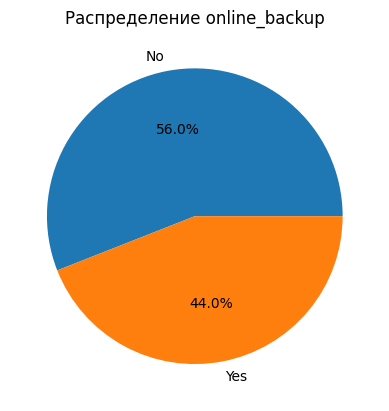

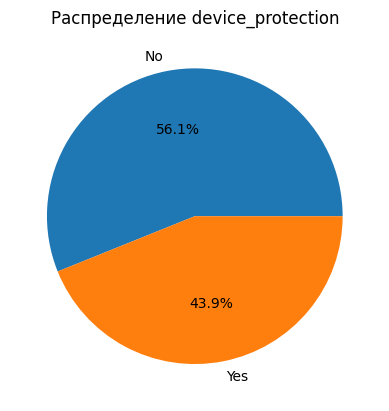

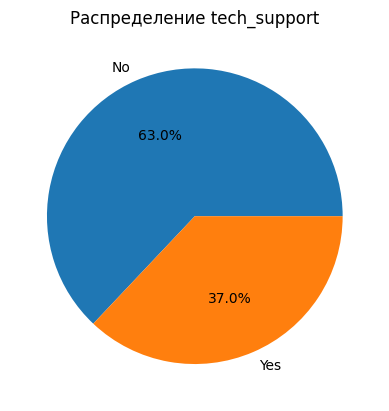

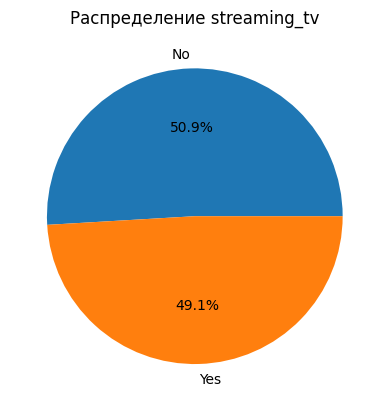

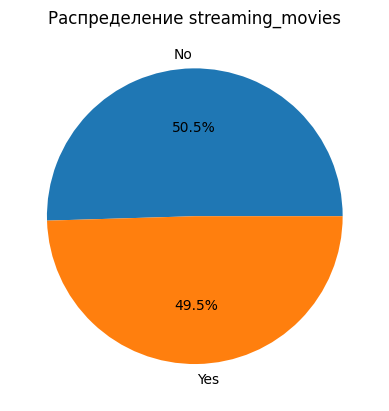

In [14]:
graphs(internet, [], ['internet_service', 'online_security', 'online_backup', 'device_protection', 
                     'tech_support', 'streaming_tv', 'streaming_movies'])

Большинство клиентов используют подключение через оптоволоконный кабель - 56.1%. Большая часть пользователей не приобретают блокировку небезопасных сайтов и антивирус, не используют облачное хранилище файлов для резервного копирования данных и выделенную линию технической поддержки. Данные сбалансированы по количеству клиентов, использующих стриминговое телевидение и каталог фильмов

### Анализ датасета phone

In [15]:
data_description(phone)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


customerID       object
MultipleLines    object
dtype: object

,Количество пропусков
customerID,0
MultipleLines,0


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2418-TPEUN,No
freq,1,3390


Данные в датасете `phone` отражают информацию информацию об услугах телефонии:
- подключение аппарата к одной или нескольким линиям

Пропуски в данных отсутствуют, данные во всех столбцах приведены к нужному типу. Приведем названия столбцов к стандартному виду

In [16]:
# Приведем названия столбцов к стандартному виду
phone.columns = (phone.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower())
# phone.columns

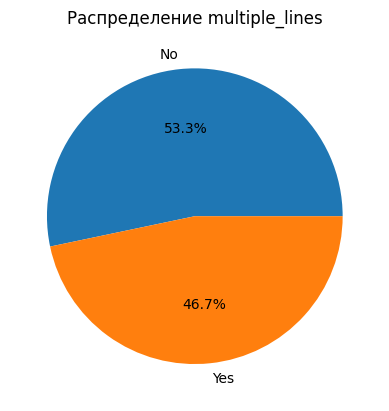

In [17]:
graphs(phone, [], ['multiple_lines'])

Большая часть клиентов не используют подключение к нескольким линиям - 53.3%

## Подготовка признаков

### Объединение датасетов

In [18]:
data = contract.copy()

for d in [personal, internet, phone]:
    data = data.merge(d, on='customer_id', how='outer')
    
# data.head()

### Обработка пропусков

Проверим объединенный датасет на наличие пропусков в данных, которые могли возникнуть после объединения

In [19]:
data.isna().sum()

customer_id             0
begin_date              0
end_date             5942
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

Пропуски, присутствующие в столбце `end_date`, можно оценить как нерасторгнутый контракт. Следовательно, можно создать столбец `target`, где 1 - расторгнутый контракт, 0 - нерасторгнутый контракт.  
  
В столбцах `internet_services`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv` и `streaming_movies` одинаковое количество пропущенных значений. Можно предположить, что пользователи не приобретают интернет услуги компании, но эту гипотезу нужно проверить.  
  
Можно предположить, что пропуски в столбце `multiple_lines` означают подключение к одной линии, так как специалисты, ответственные за внесение данных в базу, могли не указать ничего в столбце принадлежности номера клиента к нескольким линиям. Заполним пропуски значением 'No', но этот момент нужно обсудить с ответственными за выгрузку данных специалистов.  
  
Пропуски в столбце `total_charges` составляют небольшую долю от всего датасета, следовательно строчки с пропусками можно удалить

In [20]:
# Проверим гипотезу о пропусках в столбах об интернет услугах
len_internet_null = len(data[data['internet_service'].isna() & 
                        data['online_security'].isna() &
                        data['online_backup'].isna() &
                        data['device_protection'].isna() &
                        data['tech_support'].isna() &
                        data['streaming_tv'].isna() &
                        data['streaming_movies'].isna()])
print(f'Количество пропусков во всех столбцах, связанных с интернетом: {len_internet_null}')

Количество пропусков во всех столбцах, связанных с интернетом: 1526


Пропущенные значения в столбцах об интернет услугах находятся в одних и тех же ячейках, что подтверждает нашу гипотезу о неиспользовании интернет услуг некоторыми абонентами. Заменим пропуски значением 'not used'

In [21]:
# Обработаем пропуски в столбцах про интернет услуги
internet_null_cols = ['online_security', 'online_backup', 'device_protection', 
                     'tech_support', 'streaming_tv', 'streaming_movies']
data['internet_service'] = data['internet_service'].fillna(value='not used')
data[internet_null_cols] = data[internet_null_cols].fillna(value='No')
# data.isna().sum()

In [22]:
# Обработаем пропуски в столбце 'multiple_lines'
data['multiple_lines'] = data['multiple_lines'].fillna(value='No')
# data['multiple_lines'].isna().sum()

In [23]:
# Удаление пропусков в столбце 'total_charges'
data = data.dropna(subset=['total_charges'], axis=0)
# data.isna().sum()

Создадим новый признак, определяющий количество дней, на протяжении которых абонент был клиентом компании

In [24]:
def days_calculator(row):
    if pd.isnull(row['end_date']):
        # Если клиент остался, посчитаем разницу между датой выгрузки таблицы и begin_date
        return (date(2020, 2, 1) - row['begin_date'].date()).days
    # Если клиент ушел, то посчитаем разницу между первым и финальным днем
    return (row['end_date'].date() - row['begin_date'].date()).days

In [25]:
data['days'] = data.apply(lambda row: days_calculator(row), axis=1)
# data.head(10)

### Исследование корреляции между признаками

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'senior_citizen', 'days']


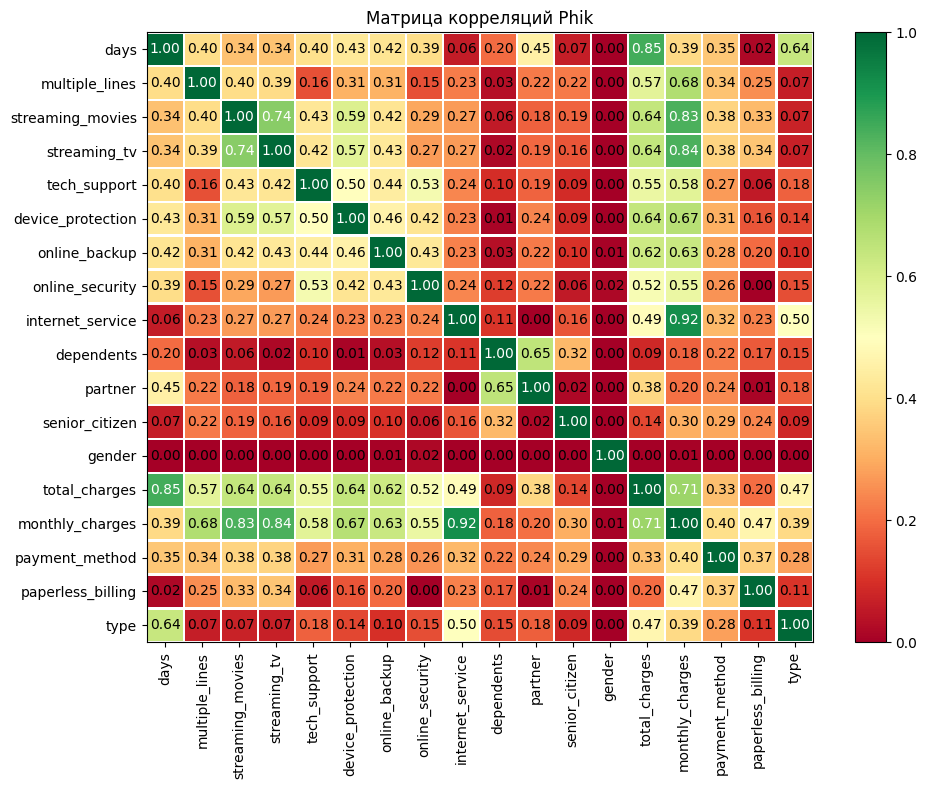

In [26]:
cols = data.columns.drop(['customer_id', 'begin_date', 'end_date'])
#cols

phik_overview = data[cols].phik_matrix()
#phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, vmin=0, vmax=1,
                        figsize=(10, 8))
plt.title('Матрица корреляций Phik')
plt.show()

Присутствует довольно сильная корреляция между `monthly_charges` и `streaming_movies`, `streaming_tv`, `internet_service`, `total_charges`. Это значит, что на месячный платеж клиента сильно влияет наличие стримингового телевидения, каталога фильмов и подключение к интернету. Есть высокая корреляция между месячным платежом и общим, что и ожидалось  
  
Исследуем корреляцию между признаками более подробно. Для этого построим графики

In [27]:
# Напишем функцию для анализа корреляции (построения графика) monthly_charges с другими признаками
def corr_monthly_charges(index, xlabel, title):
    data.pivot_table(
        values='monthly_charges', index=index, aggfunc=['mean', 'median']
    ).plot(kind='bar', figsize=(15, 7))
    plt.legend(['средний месячный платеж', 'медианный месячный платеж'])
    plt.ylabel('рубли')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

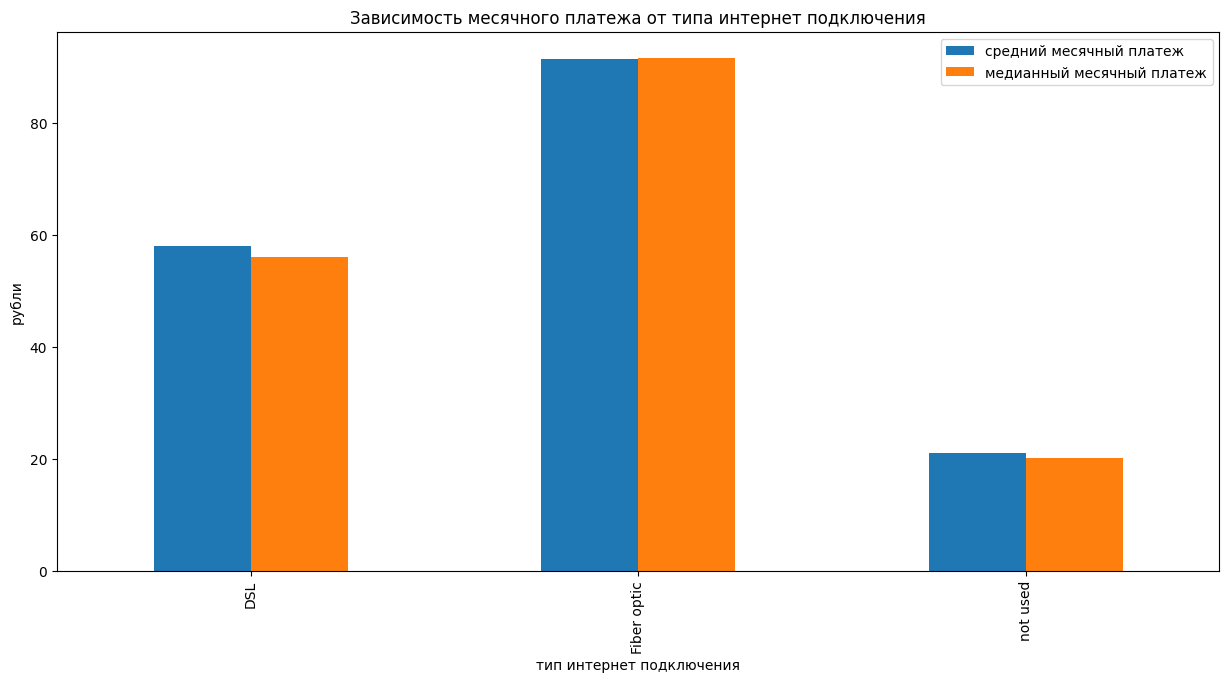

In [28]:
# Исследуем зависимость месячных платежей и типа интернет подключения
corr_monthly_charges(index='internet_service', 
                     xlabel='тип интернет подключения', 
                     title='Зависимость месячного платежа от типа интернет подключения')

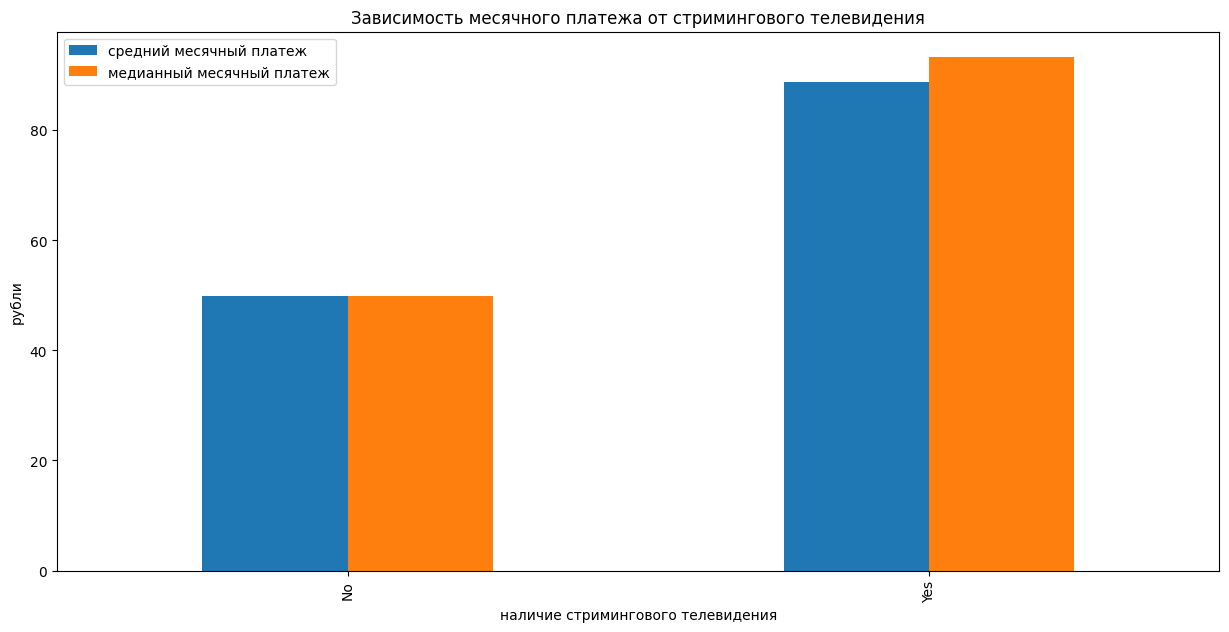

In [29]:
# Исследуем зависимость месячных платежей и стримингового телевидения
corr_monthly_charges(index='streaming_tv', 
                     xlabel='наличие стримингового телевидения', 
                     title='Зависимость месячного платежа от стримингового телевидения')

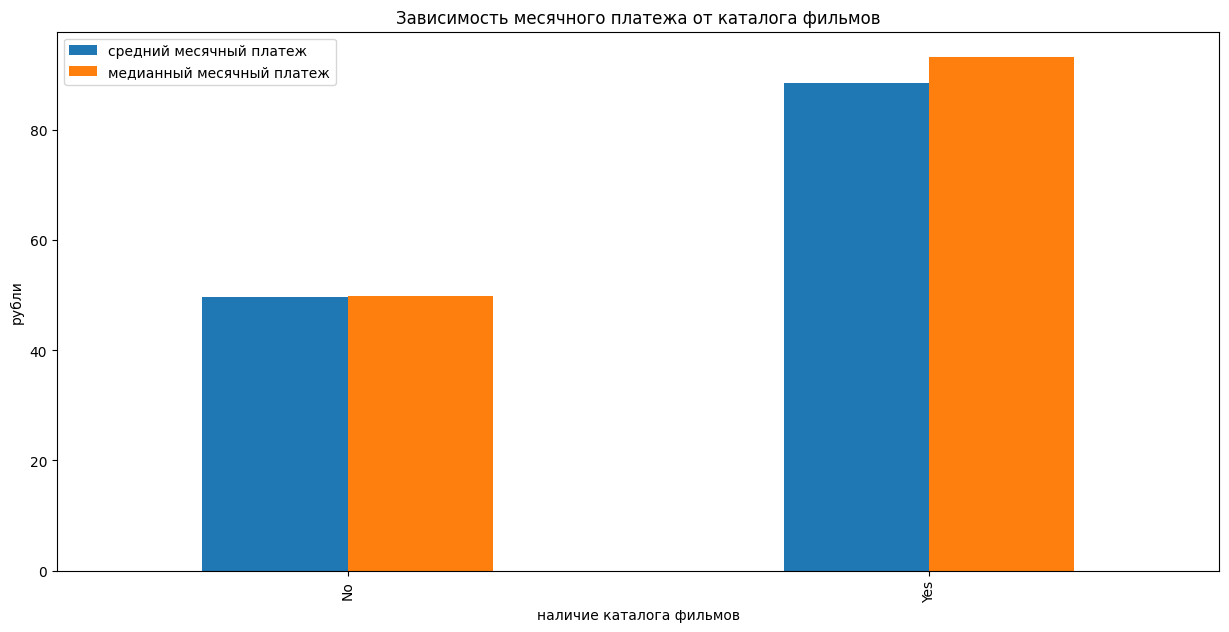

In [30]:
# Исследуем зависимость месячных платежей и каталога фильмов
corr_monthly_charges(index='streaming_movies', 
                     xlabel='наличие каталога фильмов', 
                     title='Зависимость месячного платежа от каталога фильмов')

Присутствует довольно сильная зависимость между месячным платежом клиента и типом интернет подключения: клиенты с подключением через оптоволоконный кабель в месяц в среднем платят больше, чем с подключением через телефонную линию. Абоненты, у которых есть стриминговое телефидение и каталог фильмов в среднем платят больше в месяц. Для избежания проблемы мультиколлинеарности удалим признаки из датасета `internet`, но вместо него добавим столбец, в котором 0 - абонент не использует интернет, 1 - использует

In [31]:
data['internet'] = [0 if row == 'not used' else 1 for row in data['internet_service']]
# data.head()

### Создание целевого признака

In [32]:
def target_creator(value):
    if pd.isnull(value):
        return 0 # Клиент не ушел
    return 1 # Клиент ушел

data['target'] = data['end_date'].apply(target_creator)
# data['end_date'].isna().sum() == len(data[data['target'] == 1])

## Определение профиля клиента, расторгающего договор с компанией

Исследуем корреляцию между признаками и таргетом, чтобы предсказать, какие признаки больше всего будут влиять на результат предсказания

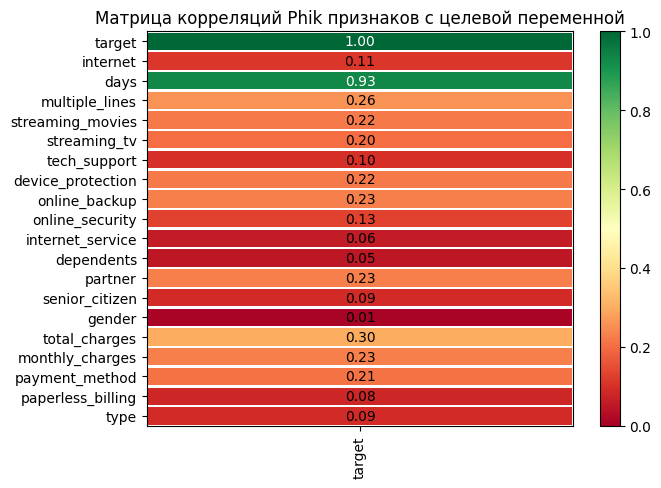

In [33]:
cols = data.drop(['customer_id', 'begin_date', 'end_date'], axis=1).columns
# cols

corr_matrix_target = pd.DataFrame(
    data[cols].phik_matrix(
        interval_cols=['monthly_charges', 'total_charges', 'month']
    )['target'].round(2))

plot_correlation_matrix(corr_matrix_target.values, 
                        x_labels=corr_matrix_target.columns, 
                        y_labels=corr_matrix_target.index, vmin=0, vmax=1,
                        figsize=(7, 5))
plt.title('Матрица корреляций Phik признаков с целевой переменной')
plt.show()

Исследуем зависимость целевой переменной от признаков более подробно, чтобы понять профиль клиентов, которые расторгают договор с компанией

**Информация о договоре**

In [34]:
def graphs_target(cols, dataset_from):
    for col in cols:
        # Для категориальных данных построим bar plot
        if data[col].dtype == 'object' and col != 'target':
            
            # Создадим вспомогательный датасет
            prelim = pd.DataFrame(
                data[cols].groupby(col)['target'].agg(
                    ['sum', 'count']
            )
            ).reset_index()
            prelim.columns = [col, 'left client', 'client']
            prelim['client'] -= prelim['left client']
            
            # Создадим merge для добавления целевого признака в датасет
            dataset_prelim = dataset_from.merge(data[['customer_id', 'target']], on='customer_id', 
                                              how='left')
            
            # Посчитаем в процентном соотношении, так как нужно учесть дисбаланс классов
            count_target_left = len(dataset_prelim[dataset_prelim['target'] == 1])
            prelim['left client'] /= count_target_left
            count_target_client = len(dataset_prelim[dataset_prelim['target'] == 0])
            prelim['client'] /= count_target_client
            
            # Построим графики
            prelim.plot(x=col, y=['left client', 'client'], kind='bar')
            plt.title(f'Распределение {col} по целевой переменной')
            plt.ylabel('Количество человек')
            plt.show()
            
        # Для непрерывных переменных построим обычный bar plot по среднему для каждого 
        # значения целевого признака
        elif data[col].dtype == 'float64' and col != 'target':
            
            # Создадим вспомогательный датасет
            prelim = pd.DataFrame(
                data.groupby('target')[col].agg('mean')
            )
            
            # Построим графики
            prelim.plot(kind='bar')
            plt.title(f'Распределение среднего {col} по целевому признаку')
            plt.ylabel('Количество человек')
            plt.show()

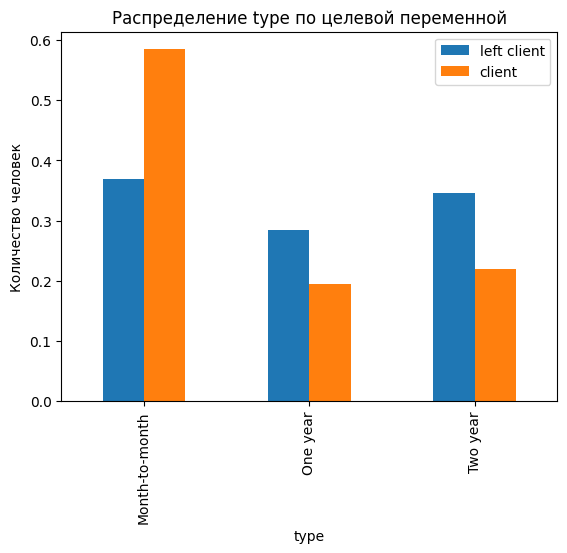

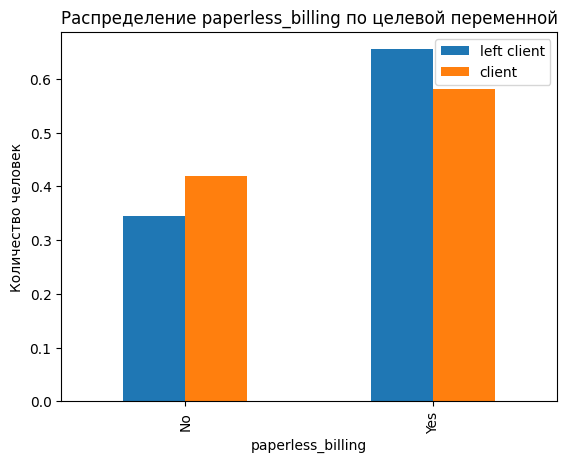

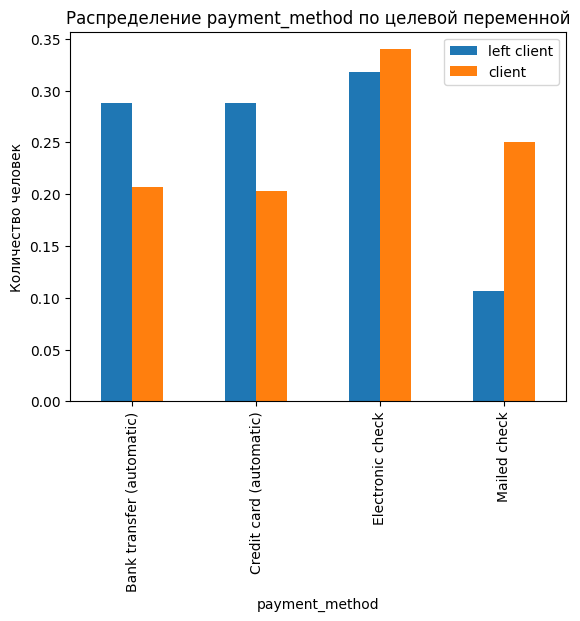

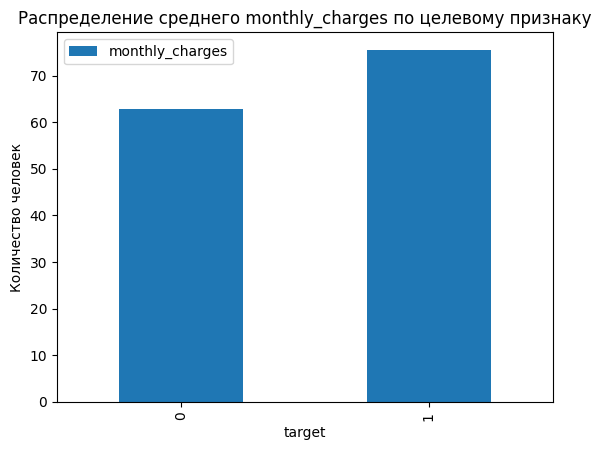

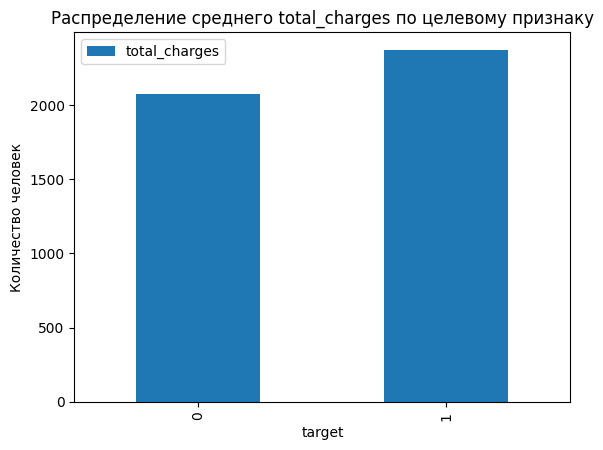

In [35]:
contract_cols = contract.drop(['customer_id', 'begin_date', 'end_date'], axis=1).columns.to_list()
contract_cols.append('target')
graphs_target(contract_cols, contract)

**Персональные данные клиента**

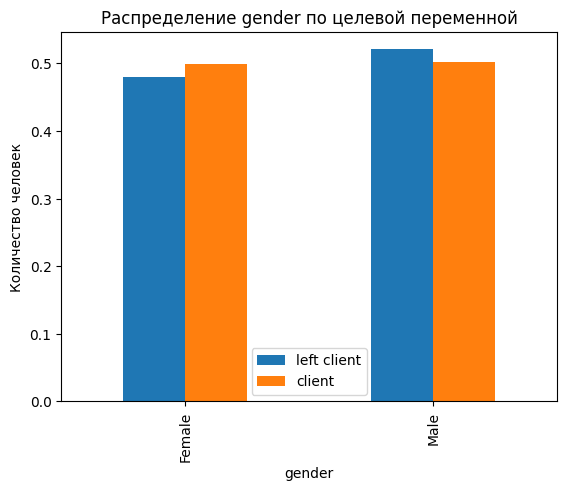

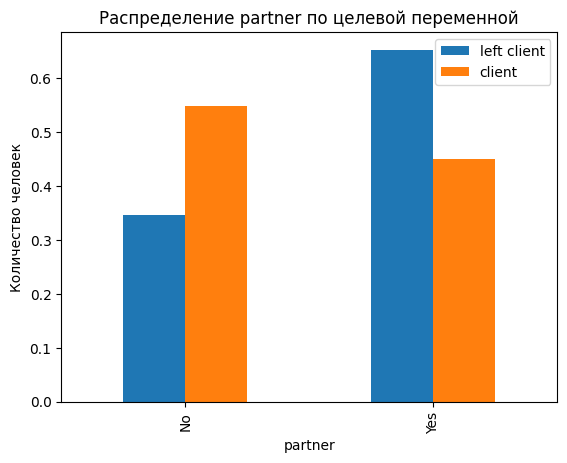

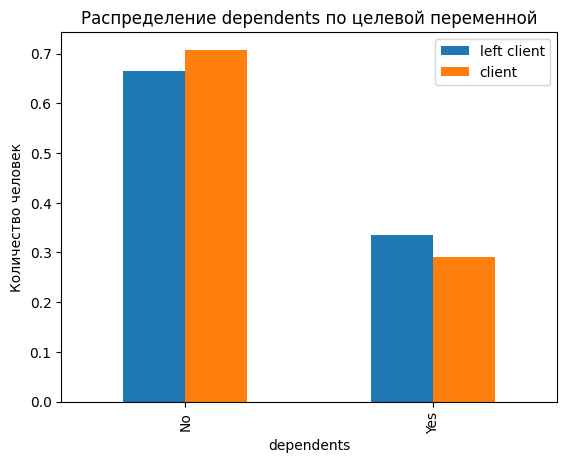

In [36]:
personal_cols = personal.drop(['customer_id'], axis=1).columns.to_list()
personal_cols.append('target')
graphs_target(personal_cols, personal)

**Информация об интернет-услугах**

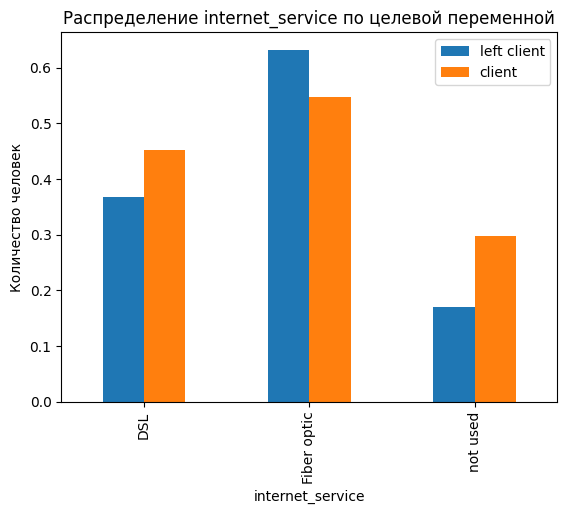

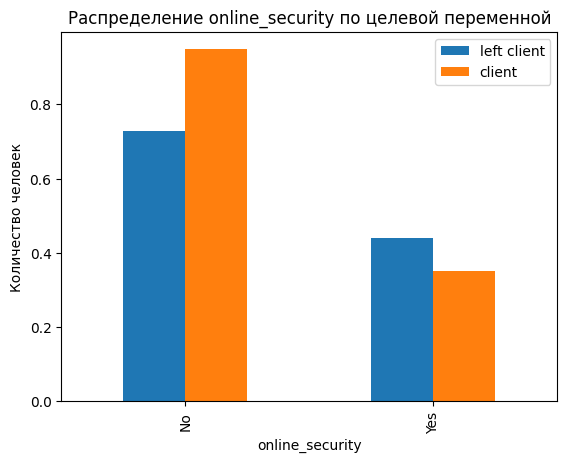

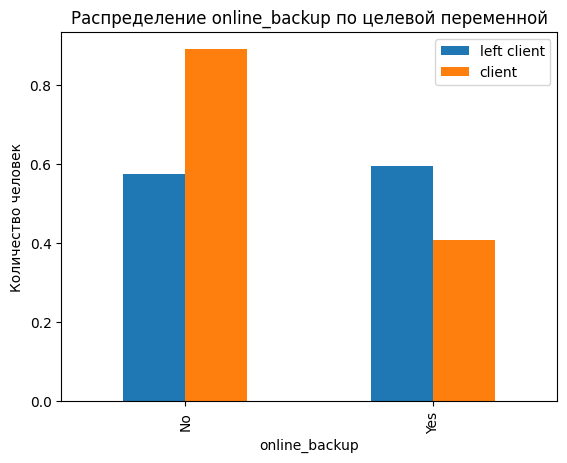

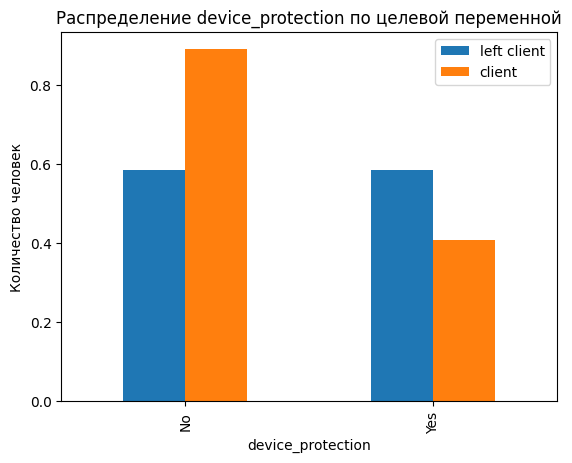

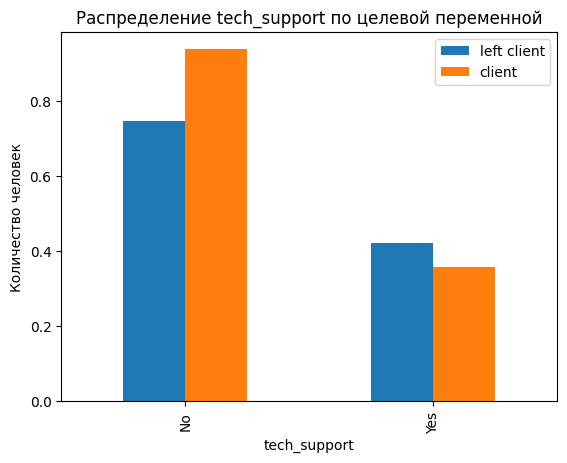

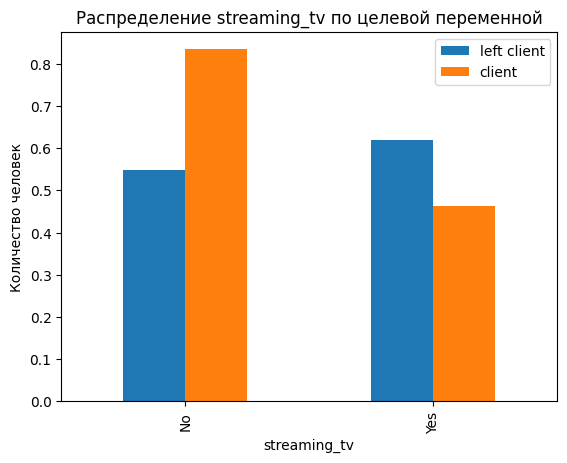

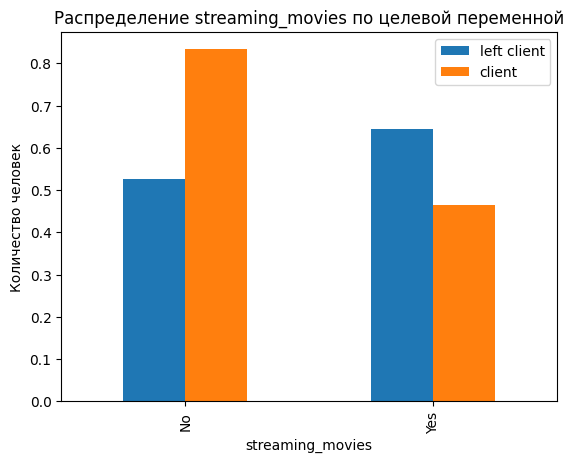

In [37]:
internet_cols = internet.drop(['customer_id'], axis=1).columns.to_list()
internet_cols.append('target')
graphs_target(internet_cols, internet)

**Информация об услугах телефонии**

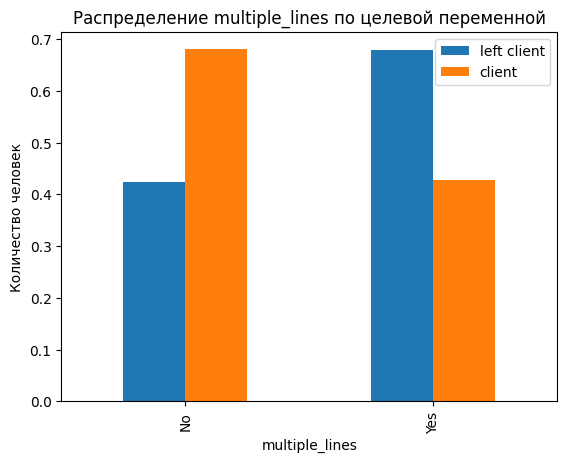

In [38]:
phone_cols = phone.drop(['customer_id'], axis=1).columns.to_list()
phone_cols.append('target')
graphs_target(phone_cols, phone)

**Профиль клиента, развергающего договор с компанией**

**Тип контракта:**
- У ушедших абонентов примерная одинаковая доля помесячной оплаты и два раза в год, действующие клиенты предпочитают помесячную оплату
- У бывших клиентов средний платеж в месяц и среднее число общих расходов выше, чем у действующих клиентов
- Распределение электронного расчетного листа и типа платежа у клиентов и ушедших абонентов примерно одинаковое
  
**Персональная информация о клиентах:**
- Больший процент ушедших клиентов имеет мужа/жену, у действующих клиентов - нет
- Пол клиента и наличие детей не сильно отличаются у клиентов и ушедших абонентов
  
**Интернет услуги:**
- Около 50% ушедших абонентов пользуются облачным хранилищем файлов и антивирусом, хотя больший процент действующих клиентов не пользуются им
- Больший процент ушедших клиентов пользуются стриминговым телевидинием и каталогом фильмов, действующие клиенты по большей части не пользуется
- Тип подключения интернета, блокировка опасных сайтов и выделенная линия технической поддержки не сильно влияет, так как у клиентов и ушедших абонентов примерно одинаковое распределение
  
**Телефонные услуги:**
- Больший процент ушедших клиентов используют подключение телефона к нескольким линиям, действующие клиенты - нет

Удалим ненужные признаки и те, которые создают мультиколлинеарность

In [39]:
data_adjusted = data.drop(['customer_id', 'begin_date', 'end_date', 'internet_service', 
                           'streaming_tv', 'streaming_movies', 'total_charges',
                           'online_backup', 'online_security', 'device_protection',
                           'tech_support', 'gender'], axis=1)

## Разделение на выборки, масштабирование и кодирование признаков

In [40]:
# Сохраним переменную random state
RANDOM_STATE = 310723

Сначала разделим данные на обучающую и тестовую выборки, разделение понадобится при масштабировании и кодировании признаков. Далее, проведем масштабирование непрерывных признаков (`monthly_charges`, `total_charges`, `month`) и сделаем кодирование категориальных признаков двумя способами - OneHotEncoder и OrdinalEncoder

In [41]:
# Разделим данные на обучающую и тестовую выборки
features = data_adjusted.drop(['target'], axis=1)
target = data_adjusted['target']

features_train, features_test, target_train, target_test = (
    train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE, stratify=target)
)

In [42]:
# Проведем мастабирование признаков

# Запишем все количественные признаки в список numeric
numeric = features_train.select_dtypes(include=['float64']).columns.to_list()
numeric.append('days')
# numeric

features_train_scaled = features_train.copy()
features_test_scaled = features_test.copy()

# Используем метод StandardScaler
# Он приводит все значения к стандартному нормальному распределению
scaler = StandardScaler()
scaler.fit(features_train_scaled[numeric])
features_train_scaled[numeric] = scaler.transform(features_train_scaled[numeric])
features_test_scaled[numeric] = scaler.transform(features_test_scaled[numeric])

#features_train_scaled.head()
#features_test_scaled.head()

In [43]:
# Проведем кодирование признаков OHE

# Сохраним категориальные признаки в список ohe_features
ohe_features = features_train_scaled.select_dtypes(include=['object', 'int64']).columns.to_list()
# ohe_features

# Сохраним копии признаков
features_train_ohe = features_train_scaled.copy()
features_test_ohe = features_test_scaled.copy()

# Создадим encoder и обучим его на тренировочных данных
encoder_ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoder_ohe.fit(features_train_ohe[ohe_features].copy())

features_train_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(
    features_train_ohe[ohe_features])
features_train_ohe = features_train_ohe.drop(ohe_features, axis=1)
#features_train_ohe.info()

features_test_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(
    features_test_ohe[ohe_features])
features_test_ohe = features_test_ohe.drop(ohe_features, axis=1)
#features_test_ohe.info()

In [44]:
# Проведем кодирование признаков OE

# Создадим и обучим encoder
encoder_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-99999)
cat_columns = features_train_scaled.select_dtypes(include=['object', 'int64']).columns.to_list()
# cat_columns
encoder_ord.fit(features_train_scaled[cat_columns])

# Сохраним копии признаков
features_train_ord = features_train_scaled.copy()
features_test_ord = features_test_scaled.copy()

# Преобразуем признаки по обученному encoder
features_train_ord[cat_columns] = encoder_ord.transform(features_train_ord[cat_columns])
# features_train_ord.info()
features_test_ord[cat_columns] = encoder_ord.transform(features_test_ord[cat_columns])
# features_test_ord.info()

В данном разделе мы провели масштабирование и кодирование признаков. Данные `features_train_ohe` будут использоваться для линейных моделей, `features_train_ord` - для 'деревянных' моделей

## Построение моделей

Рассмотрим следующие модели:
- Логистическая регрессия
- Дерево решений
- Лес решений
- CatBoost 

### Логистическая регрессия

In [45]:
%%time
grid_space_regression = {
    'C': [0.5, 1., 1.5]
}

model_regression = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)
grid_regression = GridSearchCV(
    model_regression, param_grid=grid_space_regression, cv=3, scoring='roc_auc'
)
model_grid_regression = grid_regression.fit(features_train_ohe, target_train)

CPU times: total: 625 ms
Wall time: 635 ms


In [46]:
time_regression = '219 ms'
parameters_regression = model_grid_regression.best_params_
train_auc_regression = model_grid_regression.best_score_

print(f'Наилучший результат метрики ROC-AUC: {train_auc_regression}\n'
      f'Подобранные гиперпараметры: {parameters_regression}\n'
      f'Время обучения: {time_regression}')

Наилучший результат метрики ROC-AUC: 0.7541964997431297
Подобранные гиперпараметры: {'C': 0.5}
Время обучения: 219 ms


### Дерево решений

In [47]:
%%time
grid_space_tree = {
    'max_depth': np.arange(10, 40, 5),
    'min_samples_split': np.arange(2, 11)
}

model_tree = DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)
grid_tree = GridSearchCV(model_tree, param_grid=grid_space_tree, cv=3, scoring='roc_auc')
model_grid_tree = grid_tree.fit(features_train_ord, target_train)

CPU times: total: 6.25 s
Wall time: 6.25 s


In [48]:
time_tree = '2.06 s'
parameters_tree = model_grid_tree.best_params_
train_auc_tree = model_grid_tree.best_score_

print(f'Наилучший результат метрики ROC-AUC: {train_auc_tree}\n'
      f'Подобранные гиперпараметры: {parameters_tree}\n'
      f'Время обучения: {time_tree}')

Наилучший результат метрики ROC-AUC: 0.7397091358054239
Подобранные гиперпараметры: {'max_depth': 10, 'min_samples_split': 10}
Время обучения: 2.06 s


### Лес решений

In [49]:
%%time
grid_space_forest = {
    'max_depth': np.arange(10, 40, 5),
    'n_estimators': np.arange(50, 210, 50)
}

model_forest = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)
grid_forest = GridSearchCV(model_forest, param_grid=grid_space_forest, cv=3, scoring='roc_auc')
model_grid_forest = grid_forest.fit(features_train_ord, target_train)

CPU times: total: 1min 34s
Wall time: 1min 34s


In [50]:
time_forest = '1min 34s'
parameters_forest = model_grid_forest.best_params_
train_auc_forest = model_grid_forest.best_score_

print(f'Наилучший результат метрики ROC-AUC: {train_auc_forest}\n'
      f'Подобранные гиперпараметры: {parameters_forest}\n'
      f'Время обучения: {time_forest}')

Наилучший результат метрики ROC-AUC: 0.8282012423180212
Подобранные гиперпараметры: {'max_depth': 10, 'n_estimators': 200}
Время обучения: 1min 34s


### CatBoost

In [51]:
features_train_scaled[cat_columns] = features_train_scaled[cat_columns].astype('category')
features_test_scaled[cat_columns] = features_test_scaled[cat_columns].astype('category')
# features_train_scaled.info()

In [52]:
'''
%%time
grid_space_catboost = {
    'iterations': [400, 500, 550],
    'learning_rate': [0.1, 0.2, 0.3],
    'depth': np.arange(2, 5)
}

model_catboost = CatBoostClassifier(random_state=RANDOM_STATE, verbose=False, 
                                    auto_class_weights='Balanced', cat_features=cat_columns,
                                    eval_metric='AUC:hints=skip_train~false')

grid_search_result = model_catboost.grid_search(grid_space_catboost, X=features_train_scaled, 
                                                y=target_train, cv=3, verbose=False)
'''

"\n%%time\ngrid_space_catboost = {\n    'iterations': [400, 500, 550],\n    'learning_rate': [0.1, 0.2, 0.3],\n    'depth': np.arange(2, 5)\n}\n\nmodel_catboost = CatBoostClassifier(random_state=RANDOM_STATE, verbose=False, \n                                    auto_class_weights='Balanced', cat_features=cat_columns,\n                                    eval_metric='AUC:hints=skip_train~false')\n\ngrid_search_result = model_catboost.grid_search(grid_space_catboost, X=features_train_scaled, \n                                                y=target_train, cv=3, verbose=False)\n"

In [53]:
# parameters_catboost = grid_search_result['params']

# Посчитаем метрику ROC-AUC на кросс-валидации
model_catboost = CatBoostClassifier(random_state=RANDOM_STATE, verbose=False, 
                                    auto_class_weights='Balanced', depth=3, iterations=500, 
                                    learning_rate=0.3, cat_features=cat_columns,
                                    eval_metric='AUC:hints=skip_train~false')

auc_list_catboost = cross_val_score(model_catboost, features_train_scaled, target_train, 
                                     scoring='roc_auc', cv=3)
train_auc_catboost = auc_list_catboost.mean()

parameters_catboost = {'depth': 3, 'iterations': 500, 'learning_rate': 0.3}
time_catboost = '14min 40s'

print(f'Наилучший результат метрики ROC-AUC: {train_auc_catboost}\n'
      f'Подобранные гиперпараметры: {parameters_catboost}\n'
      f'Время обучения: {time_catboost}')

Наилучший результат метрики ROC-AUC: 0.909315545968976
Подобранные гиперпараметры: {'depth': 3, 'iterations': 500, 'learning_rate': 0.3}
Время обучения: 14min 40s


## Сравнение моделей

In [54]:
train_table = pd.DataFrame(
    {
        'Модель': ['Логистическая регрессия', 'Дерево решений', 'Лес решений', 'CatBoost'],
        'Гиперпараметры': [parameters_regression, parameters_tree, 
                           parameters_forest, parameters_catboost],
        'AUC-ROC на кросс-валидации': [train_auc_regression, train_auc_tree, 
                                      train_auc_forest, train_auc_catboost],
        'Время подбора лучшей модели': [time_regression, time_tree, time_forest, time_catboost]
    }
)
train_table = train_table.set_index('Модель')
train_table

,Гиперпараметры,AUC-ROC на кросс-валидации,Время подбора лучшей модели
Модель,,,
Логистическая регрессия,{'C': 0.5},0.754196,219 ms
Дерево решений,"{'max_depth': 10, 'min_samples_split': 10}",0.739709,2.06 s
Лес решений,"{'max_depth': 10, 'n_estimators': 200}",0.828201,1min 34s
CatBoost,"{'depth': 3, 'iterations': 500, 'learning_rate...",0.909316,14min 40s


Наилучший результат показала модель градиентного бустинга catboost на 500 итерациях с глубиной дерева равной 3 и шагом в сторону градиента равным 0.3. Модель дала метрику ROC-AUC примерно равную 0.91, что проходит порог по бенчмарку ROC-AUC. Проверим модель на тестовой выборке

### Важность признаков

Посмотрим, какие признаки не важны для предсказания целевого признака - их нужно удалить, чтобы улучшить качество модели

,Feature Id,Importances
0,days,75.005677
1,monthly_charges,11.992178
2,type,5.236024
3,partner,1.849842
4,payment_method,1.644624
5,multiple_lines,1.479213
6,internet,0.863276
7,dependents,0.795026
8,paperless_billing,0.631279
9,senior_citizen,0.502861


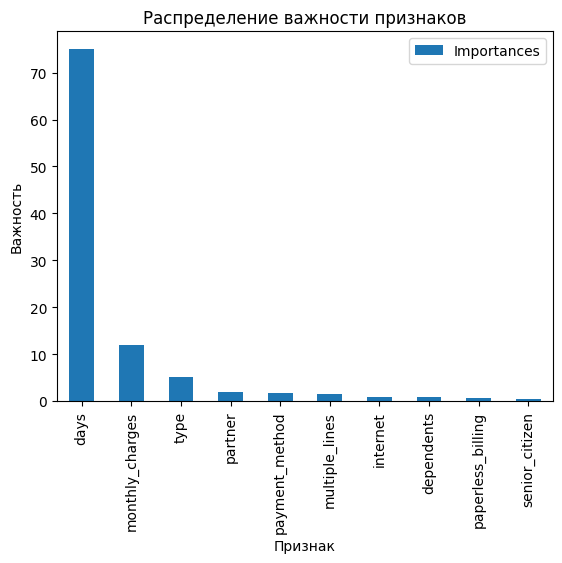

In [56]:
pooled_data_train = Pool(features_train_scaled, target_train, cat_features=cat_columns)

# Обучим модель
model_catboost.fit(features_train_scaled, target_train)

# Посчитаем важность признаков
importances = model_catboost.get_feature_importance(pooled_data_train, prettified = True)
display(importances)

# Пострим график важности
importances.plot(kind='bar');
plt.xticks(np.arange(len(importances)), importances['Feature Id'])
plt.title('Распределение важности признаков')
plt.ylabel('Важность')
plt.xlabel('Признак')
plt.show()

Наиболее важные признаки для предсказания ухода клиента: 
- Количество дней, на протяжение которых абонент являлся клиентом компании
- Размер оплаты в месяц
- Тип оплаты (раз в месяц/раз в год/раз в два года)

## Проверка модели CatBoost на тестовой выборке

In [57]:
# Сохраним предсказания вероятности ушедшего клиента
predicted_proba_1 = model_catboost.predict_proba(features_test_scaled)[:, 1]

# Посчитаем метрику ROC-AUC
auc_test = roc_auc_score(target_test, predicted_proba_1)

print(f'Значение ROC-AUC на тестовой выборке: {auc_test}')

Значение ROC-AUC на тестовой выборке: 0.924228529393735


Модель прошла порог по метрике ROC-AUC на тестовой выборке

Выведем матрицу ошибок, для лучшего изучения свойств подобранной модели

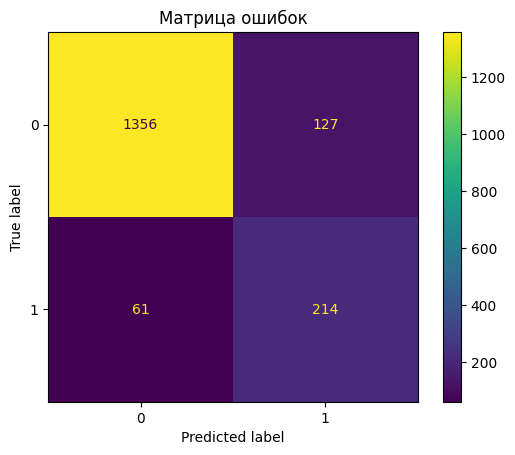

In [59]:
# Посчитаем предсказания модели
predicted_values = model_catboost.predict(features_test_scaled)

# Выведем матрицу ошибок 
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, predicted_values))
display.plot()
plt.title('Матрица ошибок')
plt.show()

Модель хорошо узнает негативные значения (клиент не ушел) - в примерно 91.4% случаях дает правильный результат, модель правильно предсказывает уход клиента примерно в 77.8% случаях правильно  
  
Так как был пройден порог по метрике ROC-AUC, модель может быть представлена заказчику

## Итоговый отчет

Подводя итоги, целью данного проекта было построение модели, предсказыващей уход клиента из телеком компании. Предсказания модели будут использоваться для предложения клиентам, собирающимся покинуть компанию, специальных промокодов и акций с целью предотвращения ухода. Ключевая метрика - ROC-AUC с пороговым значением 0.85. Считать метрику нужно на кросс-валидации.  
  
В процессе выполнения проекта все пункты плана были выполнены. Возникли трудности с преодолением порогового значения целевой метрики. Мы преодолели это с помощью создания нового признака - количества дней, на протяжение которых абонент являлся клиентом компании на основе двух столбцов: дат начала и окончания контракта (при пропуске для расчета использовалась дата загрузки таблицы - 1 февраля 2020 года). Также, для линейных моделей было проблемой наличие мультиколлинеарных признаков, что мы преодолели следующим образом:
- Мы удалили столбец с суммарными расходами клиентов
- Вместо всех столбцов, связанных с интернет - услугами, мы использовали в расчетах столбец со значениями - индикаторами (использует ли клиент интернет или нет). Это помогло избежать дублирования информации
  
В проекте мы анализировали следующие модели:
- Логистическая регрессия
- Дерево решений
- Лес решения
- Градиентный бустинг CatBoost
  
Лучший результат показала модель CatBoost на 500 итерациях с глубиной дерева равной 3 и шагом в сторону градиента равным 0.3. Значение метрики ROC-AUC на кросс-валидации - примерно 0.91, на тестовой выборке - около 0.92. Так как ROC-AUC на тестовой выборке выше, чем на кросс-валидации, отсутствует переобучение модели. Основываясь на матрицу ошибок, модель верно предсказывает уход клиента примерно в 77.8% случаях.  
  
Как было упомянуто ранее, в процессе подготовки признаков к обучению модели мы удалили столбцы, связанные с интернет-услугами и с суммарными затратами клиента. Также, мы не использовали столбцы с уникальным идентификационным номером клиента, датами начала/окончания контракта с компанией и полом клиента. Следовательно, были задействованы следующие признаки: 
- Количество дней, на протяжение которых абонент был клиентом
- Тип оплаты (раз в год/два раза в год/ежемесячно)
- Электронный расчетный лист
- Тип платежа 
- Расходы клиента в месяц 
- Является ли абонент пенсионером
- Есть ли у клиента муж/жена
- Наличие у абонента детей
- Пользование интернет - услугами
- Подключение телефона абонента к нескольким линиям одновремено  
  
В процессе предобработки данных пропуски в столбце про подключение к нескольким линиям одновременно мы обнаружили довольно много пропусков. Они были заменены на значение 'No'. Значения столбцов с количеством дней и месячными расходами клиента были привелены к нормальному стандартному распределению. Для остальных столбцов с категориальными признаками мы использовали кодирование: для линейных моделей - One Hot Encoder, для 'деревянных' - Ordinal Encoder, а для градиентного бустинга были переданы незакодированные признаки.  
  
Наиболее важными из упомянутых признаков для предсказания ухода клиента оказались:
- Количество дней, на протяжение которых абонент был клиентом
- Размер месячного платежа клиента
- Тип оплаты 
  
Так как было пройдено пороговое значение целевой метрики, цель проекта выполнена, и модель может быть представлена заказчику.